# Set up environment

In [1]:
secret = ""
license = ""
version = secret.split("-")[0]
spark_ocr_jar_path = "../../target/scala-2.12/"

### Initialize Spark session

In [2]:
from sparkocr import start
import pkg_resources
from pyspark import SparkConf
from pyspark.ml import PipelineModel
import os

from sparkocr.transformers import *
from sparkocr.utils import display_images
from sparkocr.enums import *

spark = start(jar_path = spark_ocr_jar_path)
spark

Spark version: 3.2.1
Spark NLP version: 4.2.4
Spark NLP for Healthcare version: 4.3.0
Spark OCR version: 4.3.3rc2



## Load test images

In [14]:
test_image_path = "data/ocr_test_3.pdf"
bin_df = spark.read.format("binaryFile").load(test_image_path)


In [4]:
from sparkocr.transformers import PdfToHocr

pdf_to_hocr = PdfToHocr() \
    .setOutputCol("hocr")

tokenizer = HocrTokenizer() \
        .setInputCol("hocr") \
        .setOutputCol("token") \

draw_annotations = ImageDrawAnnotations() \
        .setInputCol("image") \
        .setInputChunksCol("token") \
        .setOutputCol("image_with_annotations") \
        .setFilledRect(False) \
        .setFontSize(5) \
        .setRectColor(Color.red)

pdf_to_image = PdfToImage() \
        .setInputCol("content") \
        .setOutputCol("image") \
        .setImageType(ImageType.TYPE_3BYTE_BGR) \
        .setResolution(72)

pipeline1 = PipelineModel(stages=[
    pdf_to_hocr,
    tokenizer,
    pdf_to_image,
    draw_annotations
])

result = pipeline1.transform(bin_df).cache()

result.show()

+--------------------+--------------------+------+--------------------+----------------+---------------+--------------------+--------------------+-----------+-------+-----------+----------------------+---------+
|                path|    modificationTime|length|                hocr|height_dimension|width_dimension|               token|               image|total_pages|pagenum|documentnum|image_with_annotations|exception|
+--------------------+--------------------+------+--------------------+----------------+---------------+--------------------+--------------------+-----------+-------+-----------+----------------------+---------+
|file:/home/jose/s...|2023-03-10 14:41:...| 21258|<div title="bbox ...|             792|            612|[{token, 0, 5, fo...|{file:/home/jose/...|          1|      0|          0|  {file:/home/jose/...|     null|
+--------------------+--------------------+------+--------------------+----------------+---------------+--------------------+--------------------+------

In [25]:
pdf_to_hocr.setKeepOriginalEncoding(False).transform(bin_df).select("hocr").show(truncate=False)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


    Image #0:
    Origin: file:/home/alexander_jsl/Workspace/spark-ocr-workshop/jupyter/frx_2012_disclosure.pdf
    Resolution: 72 dpi
    Width: 612 px
    Height: 792 px
    Mode: ImageType.TYPE_3BYTE_BGR
    Number of channels: 3


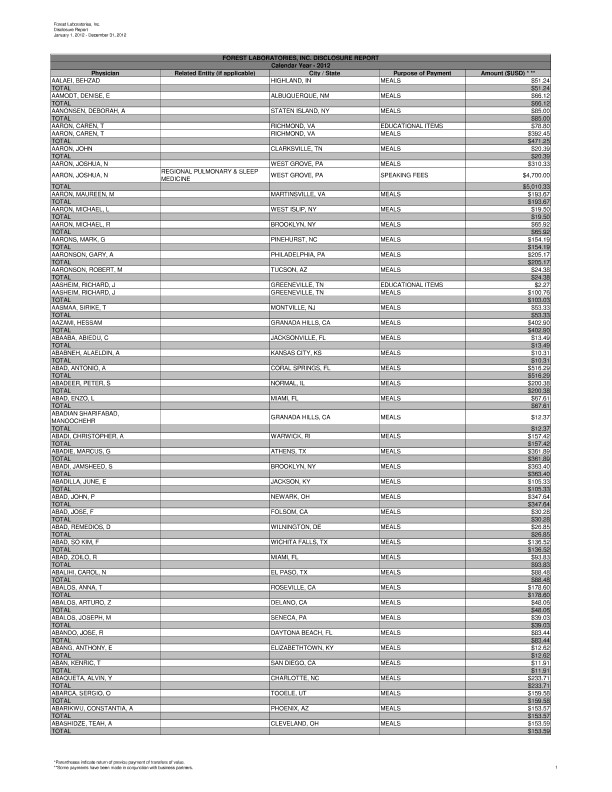

In [8]:
display_images(result, "image", width=1000)


    Image #0:
    Origin: file:/home/alexander_jsl/Workspace/spark-ocr-workshop/jupyter/frx_2012_disclosure.pdf
    Resolution: 0 dpi
    Width: 612 px
    Height: 792 px
    Mode: ImageType.TYPE_3BYTE_BGR
    Number of channels: 3


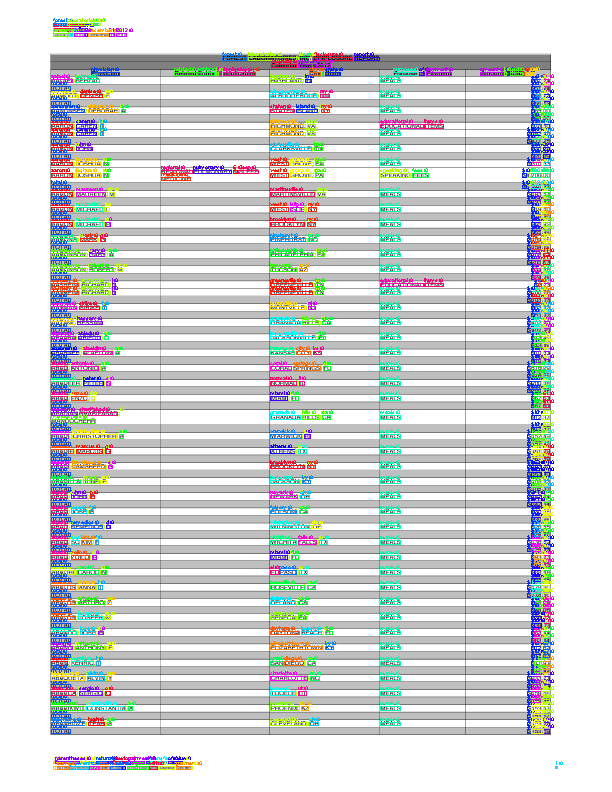

In [7]:
display_images(result, "image_with_annotations", width=1000)